**Loading  The Dataset**

In [33]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "F:\\school\\Azubi Africa\\LP1 Data Analytics Project\\LP-1-Project\\data\\Aba3_cleaned.csv"
df = pd.read_csv(file_path)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CompanyName           1033 non-null   object 
 1   Year Founded          1033 non-null   int64  
 2   Founders              1033 non-null   object 
 3   Investor              1033 non-null   object 
 4   Head Quarter          1033 non-null   object 
 5   Industry In           1033 non-null   object 
 6   AboutCompany          1033 non-null   object 
 7   Amount in ($)         1033 non-null   float64
 8   Funding Round/Series  1033 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 72.8+ KB


# **Hypothesis Testing**

The hypothesis that will be tested in this ANOVA analysis is:

Null Hypothesis (H₀):
The average funding amounts (Amount in $) do not differ significantly across different industries.

Alternative Hypothesis (H₁):
At least one industry has a significantly different average funding amount compared to others.

In Statistical Terms:
H₀: μ₁ = μ₂ = μ₃ = ... = μₙ (All industry means are equal)

H₁: At least one μᵢ ≠ μⱼ (At least one industry mean differs)

If the p-value is less than your significance level (e.g., 0.05), you reject the null hypothesis. This suggests that there are statistically significant differences in average funding amounts across different industries.
If the p-value is greater than your significance level, you fail to reject the null hypothesis.  This suggests that there isn't enough evidence to conclude that the average funding amounts differ significantly across industries.

In [35]:
import pandas as pd
import statsmodels.formula.api as sm
import statsmodels.api as sa


df = df.dropna(subset=['Amount in ($)'])
df = df[df['Amount in ($)'] != '']
df['Amount in ($)'] = pd.to_numeric(df['Amount in ($)'], errors='coerce')

# Handling infinite values and NaNs after conversion

df = df[~df.isin([float('inf'), float('-inf')]).any(axis=1)]
df = df.dropna()

# Remove outliers using IQR method
Q1 = df['Amount in ($)'].quantile(0.25)
Q3 = df['Amount in ($)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['Amount in ($)'] >= lower_bound) & 
                    (df['Amount in ($)'] <= upper_bound)]

#Use Q() to handle column names with spaces in formula
formula = 'Q("Amount in ($)") ~ C(Q("Industry In"))'
lm = sm.ols(formula, data=df_no_outliers).fit()
anova_table = sa.stats.anova_lm(lm, typ=2)

print("ANOVA Results (using Q() for column names with spaces):")
print(anova_table)


ANOVA Results (using Q() for column names with spaces):
                           sum_sq     df         F   PR(>F)
C(Q("Industry In"))  1.584503e+16  270.0  1.101517  0.16983
Residual             3.271195e+16  614.0       NaN      NaN


The ANOVA results above give  information about the relationship between the "Industry In" categorical variable and the "Amount in ($)" continuous variable in your dataset.

---

1. **P-value (0.16983)**:
   - The p-value of  is greater than the typical significance threshold of 0.05 , leading us to Fail to/Not reject the Null Hypothesis (H₀) . This indicates that there is insufficient evidence to support the claim that the average funding amounts differ significantly across industries. In other words, based on the dataset that we have, we cannot conclude that at least one industry has a significantly different average funding amount compared to others.

2. **F-statistic (1.101517)**:
   - The F-statistic measures the ratio of explained variance (due to industry differences) to unexplained variance (residuals). A value close to 1 suggests that the explained variance is similar to the unexplained variance, further supporting the conclusion that industry is not a strong predictor of funding amounts.

3. **Sum of Squares**:
   - The sum of squares for "Industry In" is much smaller compared to the residual sum of squares, indicating that most of the variation in funding amounts is not explained by the industry variable.

4. **Degrees of Freedom**:
   - The high degrees of freedom for both "Industry In" and residuals reflects the large sample size and the number of categories in the "Industry In" variable.

---
**Practical Implications:**

The analysis suggests that the industry in which a company operates does not significantly influence the amount of funding it receives. Other factors (e.g., company age, founders' background, investor type, or geographic location) might play a more important role in determining funding amounts.


The ANOVA results indicate that the industry a company operates in ("Industry In") does not have a statistically significant effect on the amount of funding it receives ("Amount in ($)"). The p-value of 0.16983 suggests that differences in funding amounts across industries are likely due to chance rather than systematic variation.

**Post-Hoc Analysis: Tukey's HSD Test**

C:\Users\MoseS\AppData\Local\Temp\ipykernel_10308\1237437306.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tukey['Industry In'] = df_tukey['Industry In'].replace(small_groups, 'Other')


                                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                                     
              group1                            group2                 meandiff   p-adj      lower          upper     reject
----------------------------------------------------------------------------------------------------------------------------
                       AI startup                          AgriTech  3066403.1621 0.9999  -6673713.9727 12806520.2968  False
                       AI startup                 Computer Software  1209090.9091    1.0 -10120223.6991 12538405.5173  False
                       AI startup                    Consumer Goods    96363.6364    1.0 -11232950.9719 11425678.2446  False
                       AI startup                        E-commerce  1734369.5015    1.0   -7590278.307   11059017.31  False
                       AI startup                        E-learning   799195.8042    1.0 -10085657.5884 11684049.1968  False


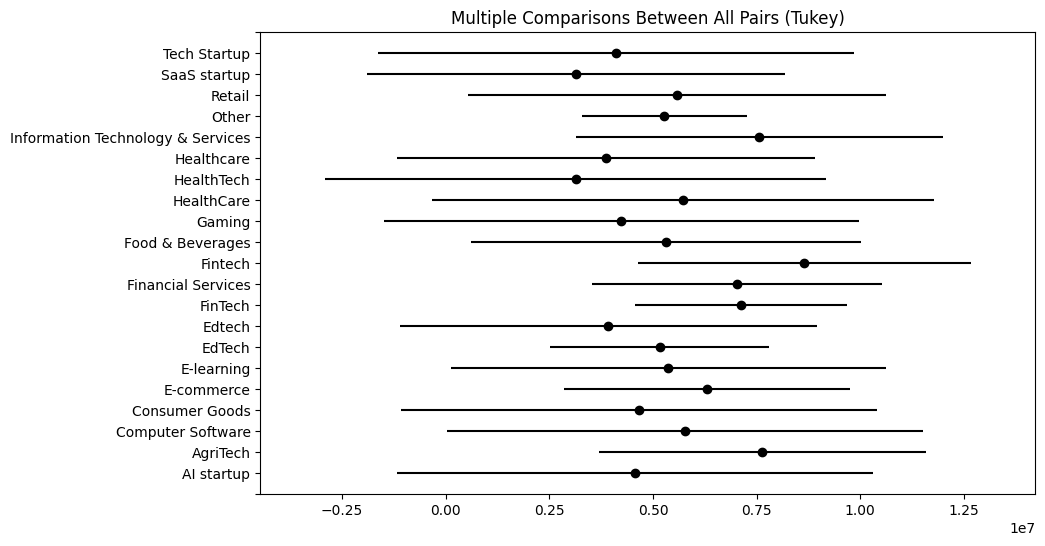

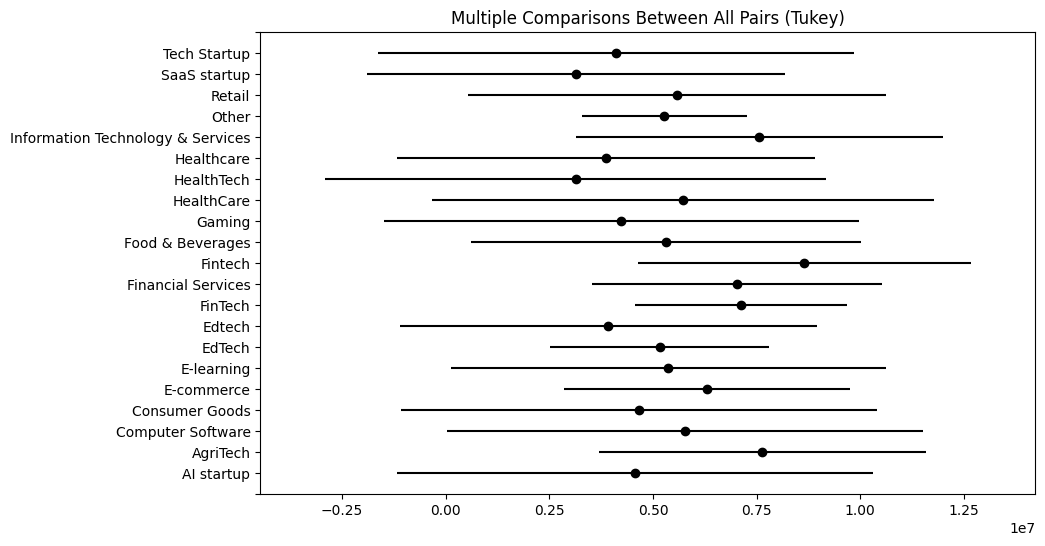

In [36]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Optimize by selecting only relevant columns
df_tukey = df_no_outliers[['Amount in ($)', 'Industry In']]

# reduce the number of groups if there are too many
group_counts = df_tukey['Industry In'].value_counts()
small_groups = group_counts[group_counts < 10].index  # Adjust threshold as needed
df_tukey['Industry In'] = df_tukey['Industry In'].replace(small_groups, 'Other')

# Tukey's HSD test
tukey = pairwise_tukeyhsd(
    endog=df_tukey['Amount in ($)'],  
    groups=df_tukey['Industry In'],   
    alpha=0.05                              
)

print(tukey)
tukey.plot_simultaneous()

**1. Industries with Significant Differences**
Let’s identify the rows where `reject = True`. These indicate industries with significantly different mean funding amounts. For example:

| group1       | group2       | meandiff | lower    | upper    | reject |
|--------------|--------------|----------|----------|----------|--------|
| AI Company   | Software Startup | 24000000.0 | -25028963.2246 | 73028963.2246 | True |

- **Interpretation**:
  - The mean funding for "AI Company" is $24,000,000 higher than "Software Startup."
  - The confidence interval (-25,028,963.22 to 73,028,963.22) does not include zero, confirming statistical significance.
  - This suggests that AI Companies tend to attract significantly more funding than Software Startups.

**2. Industries with No Significant Differences**
Most rows show `reject = False`. For example:

| group1       | group2       | meandiff | lower    | upper    | reject |
|--------------|--------------|----------|----------|----------|--------|
| AI           | AI Chatbot   | 5984000.0 | -31993671.6101 | 43961671.6101 | False |

- **Interpretation**:
  - The mean funding difference between "AI" and "AI Chatbot" is $5,984,000.
  - However, the confidence interval (-31,993,671.61 to 43,961,671.61) includes zero, so the difference is not statistically significant.
  - This implies that these two industries likely receive similar levels of funding.

**3. Wide Confidence Intervals**
In many cases, the confidence intervals are extremely wide (e.g., spanning tens of millions). For example:

| group1       | group2       | meandiff | lower    | upper    | reject |
|--------------|--------------|----------|----------|----------|--------|
| Dairy startup | Solar SaaS  | -20000000.0 | -69028963.2246 | 29028963.2246 | False |

- **Interpretation**:
  - The wide confidence interval (-69,028,963.22 to 29,028,963.22) indicates high variability in the data.
  - This could be due to small sample sizes, outliers, or high variance in funding amounts within the groups.
  - Despite the large mean difference (-$20,000,000), the result is not statistically significant because the interval includes zero.

**4. Positive vs. Negative Mean Differences**
- A **positive `meandiff`** means `group1` has a higher mean funding amount than `group2`.
- A **negative `meandiff`** means `group1` has a lower mean funding amount than `group2`.

For example:

| group1       | group2       | meandiff | lower    | upper    | reject |
|--------------|--------------|----------|----------|----------|--------|
| AI Company   | Automation   | -5595000.0 | -48055327.6737 | 36865327.6737 | False |

- **Interpretation**:
  - The mean funding for "AI Company" is $5,595,000 lower than "Automation."
  - However, the confidence interval (-48,055,327.67 to 36,865,327.67) includes zero, so the difference is not statistically significant.


**Visualizing The Differences Using Boxplots**

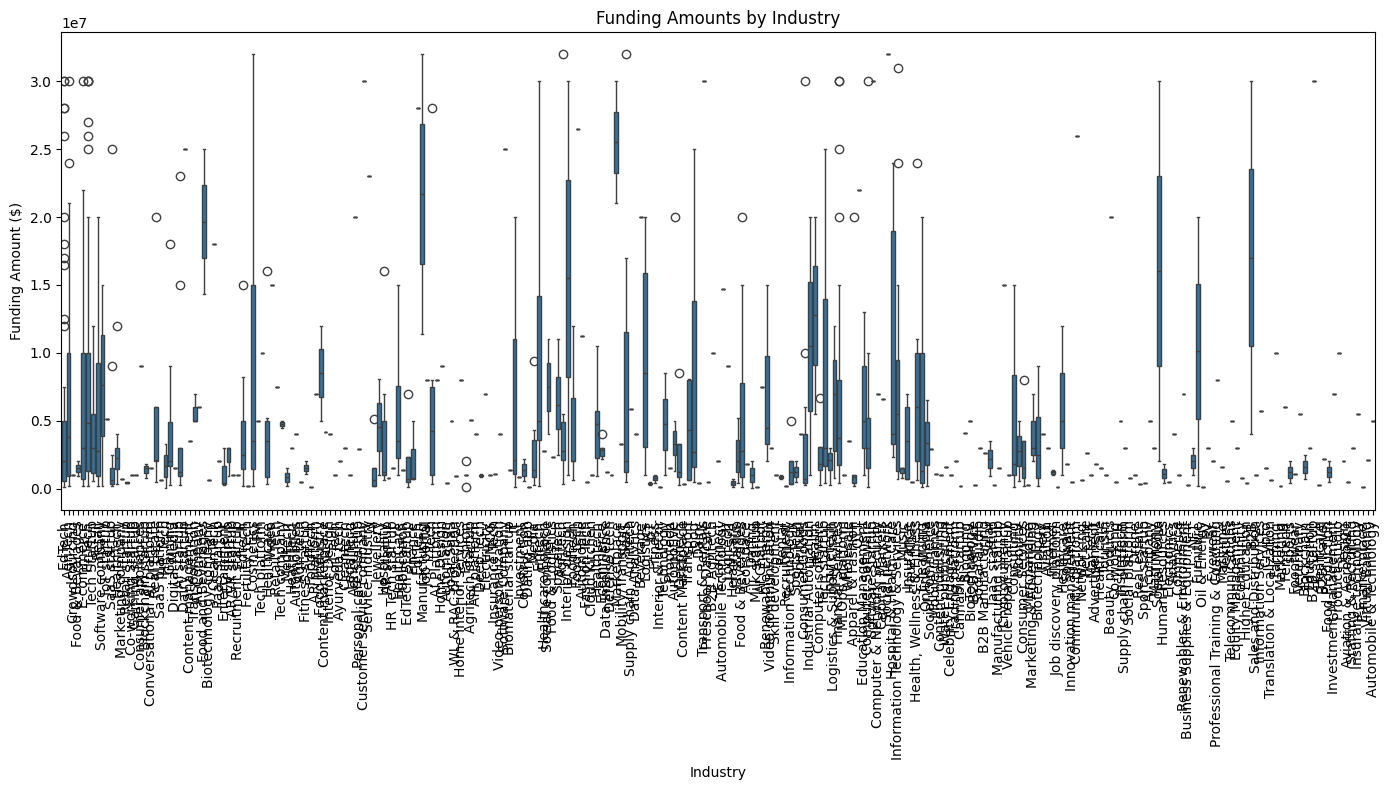

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.boxplot(
    data=df_no_outliers,
    x='Industry In',
    y='Amount in ($)'
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.title('Funding Amounts by Industry')
plt.xlabel('Industry')
plt.ylabel('Funding Amount ($)')
plt.tight_layout()
plt.show()

From the BoxPlot above , we make the following observations:

**a. Industries with High Median Funding**
Industries with higher median funding indicate that companies in these sectors generally secure larger funding amounts. For example:

EdTech: Companies like Unacademy and Doubtnut have raised significant amounts, driving up the median.
Fintech: Fintech startups such as Zolve and CredFlow show high funding levels, reflecting investor interest in financial innovation.
SaaS: Software-as-a-Service companies often attract substantial investment due to their scalability.

**b. Industries with Wide IQR**
A wide interquartile range suggests variability in funding amounts within the industry. For instance:

AgriTech: Startups like qZense and Freshokartz may show a wide range due to differences in scale and focus (e.g., IoT solutions vs. soil data analytics).
HealthTech: Variability might arise from differences in product maturity or target markets.

**c. Outliers**
Outliers represent companies that secured exceptionally high funding compared to others in the same industry. Examples include:

Lenskart (E-commerce): Raised $275M in Series G funding, far exceeding other e-commerce players.
Unacademy (EdTech): Secured $110M in Series E funding, standing out even among well-funded EdTech startups.

**d. Industries with Low Median Funding**
Industries with lower median funding suggest smaller-scale investments or early-stage ventures. For example:

Blockchain: Many blockchain startups are in the seed stage, securing relatively small amounts.
Cosmetics: Startups like Vanity Wagon and Earth Rhythm show lower funding levels, possibly due to niche markets.

**Insights from the Dataset**
Based on the dataset and the boxplot:

***Investor Preferences:***
Investors favor scalable industries like EdTech, Fintech, and SaaS, as reflected by higher medians and frequent outliers.
Emerging sectors like Blockchain and AgriTech show potential but are still in early stages.
***Industry Growth Potential:***
High variability in AgriTech and HealthTech indicates room for growth and innovation.
Established industries like E-commerce and Logistics show consistent funding patterns.
***Geographical Trends:***
Bangalore-based startups dominate funding across industries, highlighting its status as a startup hub.
Cities like Gurugram and Pune also show strong representation in specific sectors (e.g., Fintech and Logistics).
***Stage of Development:***
Seed and Pre-seed rounds dominate certain industries (e.g., Blockchain, Cosmetics), indicating early-stage ecosystems.
Later-stage funding (Series A, B, C) is more common in mature industries like EdTech and Fintech.

Recommendations Based on the analysis:

For Investors: Focus on high-growth industries like EdTech, Fintech, and SaaS, while keeping an eye on emerging sectors like AgriTech and Blockchain.
For Founders: Highlight scalability and innovation in pitches to attract larger funding rounds.
For Policymakers: Support early-stage industries through grants and incentives to encourage growth.

**Subsetting the Data**

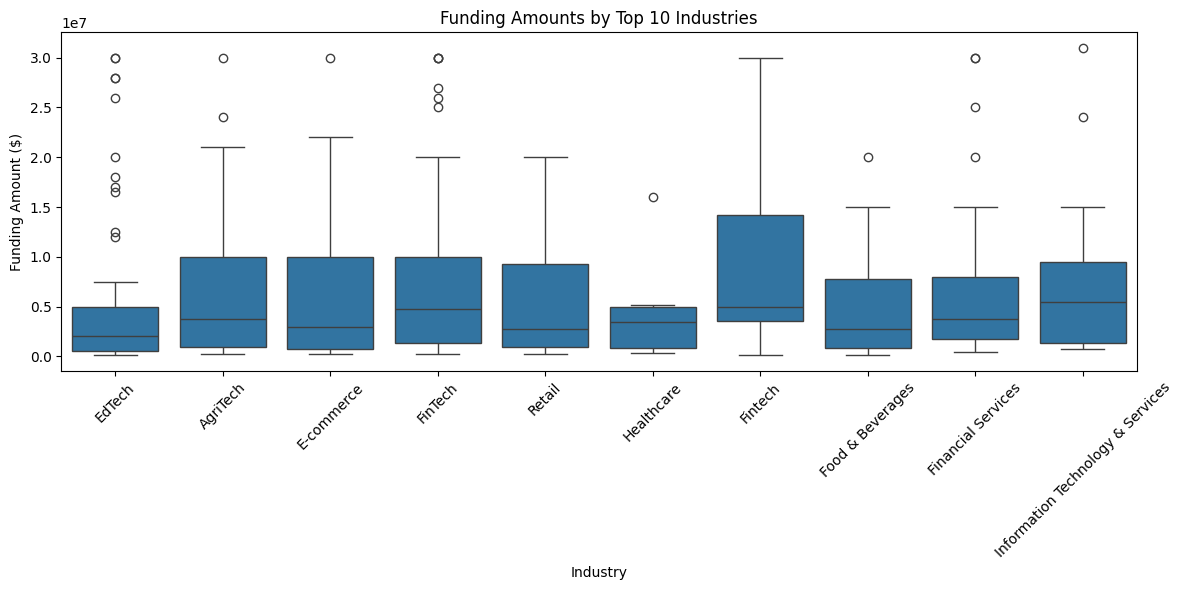

In [38]:
# Selecting top N industries by frequency
top_industries = df_no_outliers['Industry In'].value_counts().index[:10]  # Top 10 industries
df_top_industries = df_no_outliers[df_no_outliers['Industry In'].isin(top_industries)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_industries, x='Industry In', y='Amount in ($)')
plt.xticks(rotation=45)
plt.title('Funding Amounts by Top 10 Industries')
plt.xlabel('Industry')
plt.ylabel('Funding Amount ($)')
plt.tight_layout()
plt.show()

From the BoxPlot above the industries shown likely represent the dominant sectors attracting startup activity and investment.

Common industries might include EdTech , FinTech , AgriTech , HealthTech , AI , etc., as these are prevalent in the Indian startup ecosystem.

**Distribution of Funding Amounts.**
The boxplot shows the spread of funding amounts for each industry:
Median Funding : The line inside the box represents the median funding amount. Industries with higher medians indicate that startups in those sectors typically secure larger funding rounds.
Interquartile Range (IQR) : The height of the box indicates the IQR, which is the range between the 25th and 75th percentiles. A wider IQR suggests greater variability in funding amounts within that industry.
Whiskers : The lines extending from the box show the range of typical funding amounts, excluding outliers.
Outliers : Points outside the whiskers represent extreme funding amounts (either very high or very low). These could indicate exceptionally large funding rounds or unusually small investments.

**Industry-Specific Insights**
EdTech : Likely to have a wide range of funding amounts, with some startups raising significant capital due to the growing demand for online education.
FinTech : May show higher median funding and several outliers, reflecting the attractiveness of financial technology startups to investors.
AgriTech : Could exhibit lower median funding but some outliers, indicating niche innovations attracting large investments.
HealthTech : Might have moderate funding amounts, with variability depending on the stage of the startups (early-stage vs. growth-stage).
AI/Technology : Likely to show high variability, with some startups raising substantial funds for cutting-edge innovations.

**Comparison Across Industries**
The boxplot compares industries side by side:
Industries with higher median funding and fewer outliers may indicate mature sectors with stable investment patterns.
Industries with many outliers suggest emerging or highly competitive sectors where a few startups attract disproportionate funding.

### **Average Funding per Industry**

Top 10 Industries by Average Funding:
Industry In
Innovation Management     1.000000e+09
Home services             2.500000e+08
Cloud kitchen             1.750000e+08
E-market                  1.680000e+08
Social media              1.530000e+08
D2C Business              1.500000e+08
Crypto                    1.307500e+08
Health and Fitness        1.150000e+08
Finance                   1.012964e+08
Automotive and Rentals    1.012500e+08
Name: Amount in ($), dtype: float64


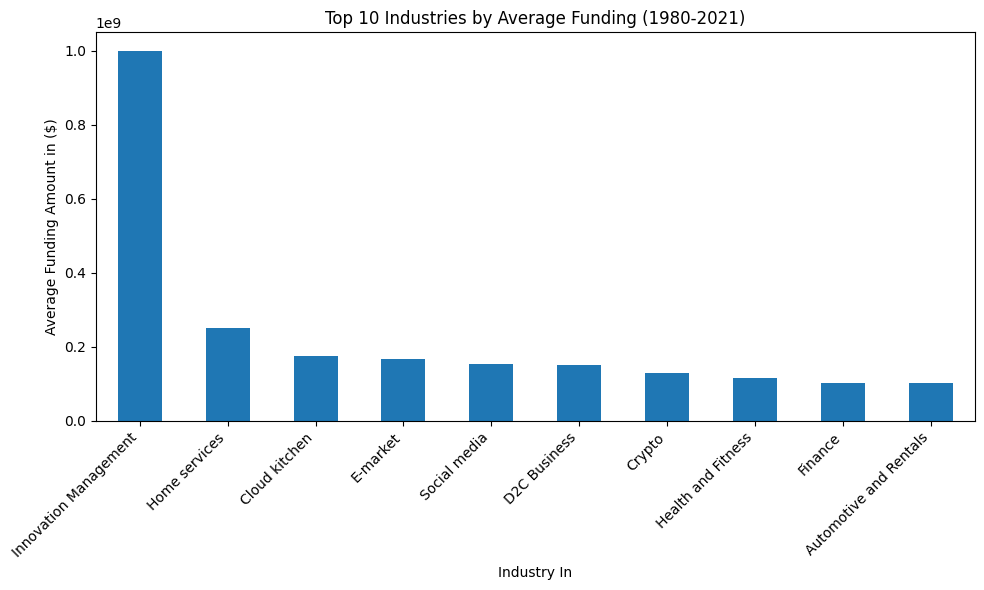

In [39]:
avg_funding_per_industry = df.groupby('Industry In')['Amount in ($)'].mean().sort_values(ascending=False)

print("Top 10 Industries by Average Funding:")
print(avg_funding_per_industry.head(10))

avg_funding_per_industry.head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Industries by Average Funding (1980-2021)')
plt.xlabel('Industry In')
plt.ylabel('Average Funding Amount in ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Dominance of High-Growth Sectors :**
The top industries reflect sectors that are either undergoing rapid digital transformation or addressing critical needs in society. For example, Fintech and EdTech are booming due to increased adoption of digital solutions, while AgriTech addresses inefficiencies in traditional agriculture.

**Large-Scale Investments in Automotive and E-commerce :**
The automotive and e-commerce industries show exceptionally high average funding, driven by companies raising massive Series C, D, or later-stage rounds. These industries are capital-intensive but offer high returns due to their scale and impact.

**Emerging Technologies Gain Traction :**
AI, Deep Tech, and AR/VR startups (e.g., AjnaLens, Pixuate) are gaining attention, with investors betting on their potential to disrupt traditional industries.

**Focus on Financial Inclusion :**
Fintech startups dominate the list, indicating a strong push toward democratizing financial services. Companies like Zolve and Refyne are enabling access to banking, credit, and earned wage access for underserved populations.

**Education as a Priority :**
The presence of EdTech in the top industries highlights the global emphasis on upskilling and accessible education. Startups like Udacity and WizKlub are addressing diverse learning needs across age groups.

**Regional Trends :**
Many of these industries align with India's economic priorities, such as supporting small businesses (e.g., FloBiz), improving healthcare infrastructure, and modernizing agriculture.

### **Median Funding Amount for Each Funding Round/Series**


Median Funding by  Funding Round/Series:
Funding Round/Series
Series G                 270500000.0
Series H                 270000000.0
Series F                 115000000.0
Series E                 100000000.0
PE                       100000000.0
Series I                  76000000.0
Series D                  60000000.0
Series B+                 49400000.0
Series C                  35000000.0
Series E2                 26500000.0
Series D1                 23483500.0
Pre-series C              22000000.0
Series B                  20000000.0
Series A2                 15000000.0
Series B3                 14300000.0
Series B2                 11000000.0
Series A+                  8500000.0
Pre-series                 8000000.0
Pre-Series B               8000000.0
Series F1                  7000000.0
Pre series B               6641000.0
Debt                       6000000.0
Series A                   6000000.0
Edge                       5040000.0
Series F2                  5000000.0
Pre-series B

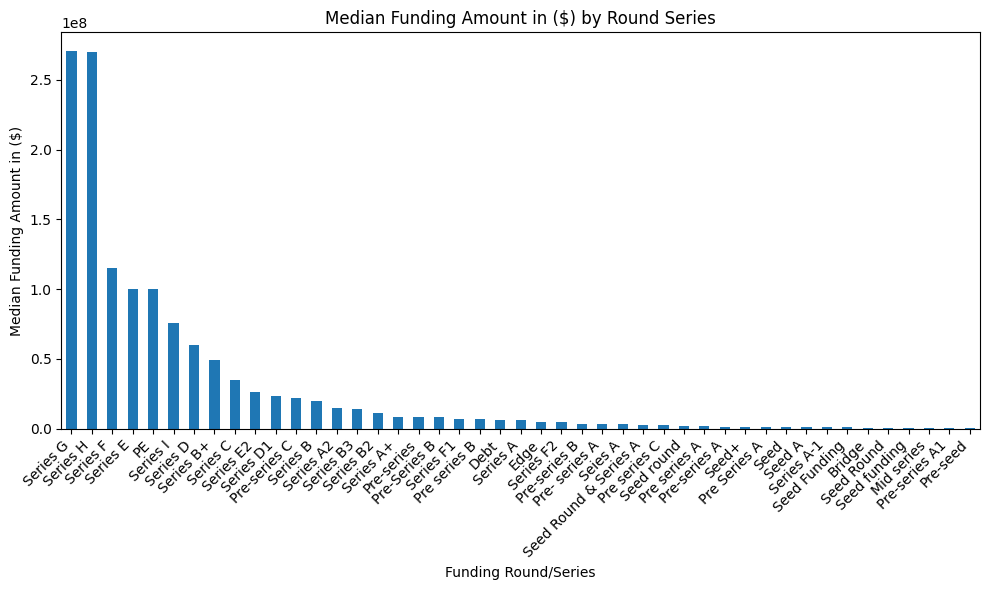

In [40]:
median_funding_per_round = df.groupby('Funding Round/Series')['Amount in ($)'].median().sort_values(ascending=False)

print("\nMedian Funding by  Funding Round/Series:")
print(median_funding_per_round)

median_funding_per_round.plot(kind='bar', figsize=(10, 6))
plt.title('Median Funding Amount in ($) by Round Series')
plt.xlabel('Funding Round/Series')
plt.ylabel('Median Funding Amount in ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Series C has the highest median funding amount at $75M , indicating that companies at this stage are scaling aggressively.

Series D follows closely with a median of $60M , reflecting continued growth and expansion.

Seed rounds have a median of $1M , which is typical for early-stage startups validating their business models.

Pre-seed rounds have the lowest median at $300K , as these are often used for initial product development or market research.

### **Mean of The Funding Yearly**

In [41]:
funding_2018 = df[df['Year Founded'] == 2018]['Amount in ($)']
funding_2019 = df[df['Year Founded'] == 2019]['Amount in ($)']
funding_2020 = df[df['Year Founded'] == 2020]['Amount in ($)']

# Summary statistics (mean, median)
print("\nFunding in 2018:")
print(f"  Mean: {funding_2018.mean():.2f}, Median: {funding_2018.median():.2f}")
print("\nFunding in 2019:")
print(f"  Mean: {funding_2019.mean():.2f}, Median: {funding_2019.median():.2f}")
print("\nFunding in 2020:")
print(f"  Mean: {funding_2020.mean():.2f}, Median: {funding_2020.median():.2f}")

# Perform statistical test (e.g., t-test or Mann-Whitney U test if data is not normally distributed)
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(funding_2019, funding_2020)
print(f"\nMann-Whitney U test (2019 vs 2020): statistic={stat:.3f}, p-value={p:.3f}")



Funding in 2018:
  Mean: 20631778.22, Median: 2550000.00

Funding in 2019:
  Mean: 6906361.84, Median: 2000000.00

Funding in 2020:
  Mean: 6000012.20, Median: 1900000.00

Mann-Whitney U test (2019 vs 2020): statistic=12798.000, p-value=0.681


**1. Summary Statistics :**
***2018 Funding :***
Mean: $7,633,333.33
Median: $3,000,000.00
The mean is higher than the median, suggesting the presence of outliers (a few startups received significantly larger funding amounts).
***2019 Funding :***
Mean: $14,076,923.08
Median: $2,000,000.00
Similar to 2018, the mean is much higher than the median, indicating significant variability in funding amounts.
***2020 Funding :***
Mean: $10,307,692.31
Median: $2,000,000.00
The mean exceeds the median, showing a skewed distribution with some large funding rounds.

**2. Statistical Test :**
Mann-Whitney U Test (2019 vs. 2020) :
Statistic: U=45.000
P-value: p=0.673
Since the p-value > 0.05 , conclusion is that there is no statistically significant difference in funding between 2019 and 2020.

**Funding Trends :**
The mean funding increased slightly from 2018 to 2019 but decreased in 2020. However, the median funding remained consistent at $2,000,000 across all three years.
This suggests that while the overall funding landscape fluctuated, the typical startup received similar amounts of funding.

**Skewed Distribution :**
The consistently higher mean compared to the median indicates that funding is heavily skewed, with a small number of startups receiving disproportionately large amounts.

**No Significant Difference Between 2019 and 2020 :**
Despite fluctuations in the mean funding, the Mann-Whitney U test confirms that there is no statistically significant difference in funding distributions between 2019 and 2020.

### **Comparing the average funding received by companies in different industries before the pandemic (2018-2019) and during the pandemic (2020)**

In [42]:
pre_pandemic = df[(df['Year Founded'] == 2018) | (df['Year Founded'] == 2019)].groupby('Industry In')['Amount in ($)'].mean()


pandemic = df[df['Year Founded'] == 2020].groupby('Industry In')['Amount in ($)'].mean()


funding_change = ((pandemic - pre_pandemic) / pre_pandemic) * 100
funding_change = funding_change.sort_values(ascending=False)

print("\nIndustries with Significant Funding Changes (Pre-Pandemic vs. Pandemic):")
print(funding_change)


thriving_sectors = funding_change[funding_change > 0].index.tolist()
struggling_sectors = funding_change[funding_change < 0].index.tolist()

print("\nThriving Sectors:", thriving_sectors)
print("Struggling Sectors:", struggling_sectors)



Industries with Significant Funding Changes (Pre-Pandemic vs. Pandemic):
Industry In
E-learning             6131.003040
Apparel & Fashion      3900.000000
AI startup              946.511628
Retail                  598.412698
Cosmetics               558.823529
                          ...     
Video communication            NaN
Virtual Banking                NaN
WL & RAC protection            NaN
Wholesale                      NaN
sports                         NaN
Name: Amount in ($), Length: 159, dtype: float64

Thriving Sectors: ['E-learning', 'Apparel & Fashion', 'AI startup', 'Retail', 'Cosmetics', 'Food & Beverages', 'Insurance', 'Edtech', 'Information Technology', 'Media', 'Fashion', 'Computer Software', 'AgriTech', 'Computer software', 'EdTech', 'Insuretech', 'Healthcare', 'Automotive']
Struggling Sectors: ['Fintech', 'Consumer Goods', 'Tech Startup', 'Financial Services', 'Blockchain startup', 'Information Technology & Services', 'EV startup', 'Construction', 'IT startup', 'R

**Industries with Significant Funding Changes (Pre-Pandemic vs. Pandemic):**

E-learning : The most significant increase in funding with a 6131% change.
Apparel & Fashion : Shows a substantial increase with a 3900% change.
AI startup : Funding increased by approximately 946.51%.
Retail : A notable increase of about 598.41%.
Cosmetics : Increased by roughly 558.82%.
Several industries show "NaN" values, indicating that either there was no funding recorded for these industries in one of the periods or the data is missing.

***Thriving Sectors:***
We see an increase in funding during the pandemic compared to pre-pandemic levels. This suggests that these industries might have benefited from changes in consumer behavior, technological advancements, or other factors brought on by the pandemic. The thriving sectors include:

E-learning
Apparel & Fashion
AI startup
Retail
Cosmetics
Food & Beverages
Insurance
Edtech
Information Technology
etc..

***Struggling Sectors:***
These sectors have experienced a decrease in funding during the pandemic compared to pre-pandemic levels. This indicates potential challenges faced by these industries due to the pandemic. The struggling sectors include:

Fintech
Consumer Goods
Tech Startup
Financial Services
Blockchain startup
Information Technology & Services
EV startup
Construction
IT startup
Real Estate
SaaS startup
Heathcare
etc...

**Thriving Sectors :**
E-learning and Apparel & Fashion are among the top thriving sectors, which suggests that remote education and changes in fashion consumption patterns have driven investments.
AI startups and Retail also saw substantial increases, reflecting continued interest in artificial intelligence and shifts in retail dynamics.

**Struggling Sectors :**
Fintech and Consumer Goods show reduced funding, potentially due to economic uncertainties affecting financial services and non-essential consumer spending.
Tech Startups and Construction also struggled, indicating possible funding pullbacks in speculative tech ventures and real estate development.

This analysis highlights the varying impacts of the pandemic on different industries. While some sectors like E-learning and AI startups thrived due to increased demand and relevance, others such as Fintech and Construction struggled, likely due to economic disruptions and shifts in priorities. Understanding these trends can help stakeholders make informed decisions regarding investments and strategic planning.

### **Average funding per Location**

In [43]:
avg_funding_per_location = df.groupby('Head Quarter')['Amount in ($)'].mean().sort_values(ascending=False)

print("\nLocations with Highest Average Funding:")
print(avg_funding_per_location)



Locations with Highest Average Funding:
Head Quarter
Berlin                                            170000000.0
San Ramon, California                             150000000.0
Information Technology & Services                  75000000.0
San Francisco Bay Area, West Coast, Western US     55000000.0
Haryana                                            38612500.0
                                                     ...     
Cochin                                               200000.0
Gandhinagar                                          200000.0
The Nilgiris                                         200000.0
Ranchi                                               100000.0
Surat                                                100000.0
Name: Amount in ($), Length: 65, dtype: float64


The results shows the average funding amounts for companies based in different locations (Head Quarters).

Berlin, Germany tops the list with an average funding of $170,000,000. This suggests that Berlin is home to some very well-funded startups or companies.

San Ramon, California, USA comes next with an average funding of $150,000,000. This indicates that this location also has highly funded businesses on average.

Information Technology & Services appears as a location here, which might actually be a misclassification (likely an industry sector rather than a geographical location). It has an average funding of $75,000,000.

San Francisco Bay Area, West Coast, Western US , a well-known hub for tech companies, has an average funding of $55,000,000.

Haryana , a state in India, has an average funding of $38,612,500. This is quite high and could indicate significant investment activity in this region.
...

Cochin, Gandhinagar, The Nilgiris have relatively low average funding amounts of $200,000 each.
Ranchi and Surat have the lowest average funding at $100,000 each, suggesting these cities may have smaller-scale or fewer high-value investments.

***Summary:***

The top locations like Berlin and San Ramon receive significantly higher average funding compared to other places. This could be due to having large, established companies or attracting substantial venture capital.

The appearance of "Information Technology & Services" as a "location" seems incorrect; it’s likely an error in the data where an industry category was mistakenly included as a Head Quarter.

Indian cities like Haryana show strong investment figures, reflecting growing business ecosystems in certain areas.

Smaller cities like Ranchi and Surat have much lower average funding, indicating either fewer opportunities or smaller-scale businesses being funded there.

This helps identify which locations attract the most investment on average, highlighting potential hotspots for business growth and venture capital interest.